<a href="https://colab.research.google.com/github/Thayrov/OracleADSForDS/blob/main/OracleADSForDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

## Aula 1

### 1.5 Versión de las bibliotecas

In [1]:
pip install oracle-ads

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for circuitbreaker: filename=circuitbreaker-1.4.0-py3-none-any.whl size=7518 sha256=29b8b17316ea94e7f26340e94d46d592f4d86ec2f01ac9276a771ccd5f520695
  Stored in directory: /root/.cache/pip/wheels/3c/be/64/266b6ce2ef1130de5e419f04805acbb2df5a4ab1b91348f25b
Successfully built circuitbreaker


In [2]:
import ads
import pandas as pd

In [3]:
ads.__version__

'2.8.10'

In [4]:
pd.__version__

'1.5.3'

## Aula 2

### 2.1 Archivos Externos

In [5]:
datos = pd.read_csv('framingham.csv')
datos.sample(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3544,1,57,1.0,0,0.0,0.0,0,0,0,242.0,130.0,74.0,28.90,60.0,53.0,0
1022,1,36,1.0,0,0.0,0.0,0,1,0,167.0,155.0,74.0,19.42,125.0,81.0,0
1488,1,37,4.0,1,60.0,0.0,0,0,0,254.0,122.5,82.5,23.87,88.0,83.0,0
356,1,53,1.0,0,0.0,0.0,0,1,0,202.0,140.5,90.0,25.82,85.0,74.0,0
2975,1,38,2.0,1,20.0,0.0,0,0,0,220.0,126.0,88.0,24.46,77.0,74.0,0


In [6]:
datos.shape

(4238, 16)

In [7]:
datos.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### 2.2 Cargando el CSV

In [9]:
pip install oracle-ads[data]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 80.7 MB/s eta 0:00:00
  Created wheel for fusepy: filename=fusepy-3.0.1-py3-none-any.whl size=10486 sha256=b9773fd086000c842eadfe8929360161fdd7a0d19b27e54e10bc933a987234a7
  Stored in directory: /root/.cache/pip/wheels/c0/18/f6/f0d6be9d0435e2677ce5cc758e91da50053dce456a346f08c5
Successfully built fusepy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.21
    Uninstalling SQLAlchemy-2.0.21:
      Successfully uninstalled SQLAlchemy-2.0.21
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.

In [10]:
from ads.dataset.factory import DatasetFactory

ds = DatasetFactory.open('framingham.csv', target='TenYearCHD')
ds.head()

  ds = DatasetFactory.open('framingham.csv', target='TenYearCHD')



loop1:   0%|          | 0/4 [00:00<?, ?it/s]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
type(ds)

ads.dataset.classification_dataset.BinaryClassificationDataset

In [12]:
type(datos)

pandas.core.frame.DataFrame

In [13]:
ds.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [14]:
dict_ing_esp = {
                     'male': 'sexo',
                     'age': 'edad',
                     'education': 'escolaridad',
                     'currentSmoker': 'fumador',
                     'cigsPerDay': 'cigarrillos_por_dia',
                     'BPMeds': 'uso_medicamento_presion',
                     'prevalentStroke': 'acv',
                     'prevalentHyp': 'hipertension',
                     'diabetes': 'diabetes',
                     'totChol': 'colesterol_total',
                     'sysBP': 'presion_arterial_sistolica',
                     'diaBP': 'presion_arterial_diastolica',
                     'BMI': 'imc',
                     'heartRate': 'frecuencia_cardiaca',
                     'glucose': 'glicemia',
                     'TenYearCHD': 'riesgo_eac_decada'
}

In [15]:
ds = ds.rename_columns(columns=dict_ing_esp)

In [86]:
ds.columns

Index(['sexo', 'edad', 'fumador', 'cigarrillos_por_dia',
       'uso_medicamento_presion', 'acv', 'hipertension', 'diabetes',
       'colesterol_total', 'presion_arterial_sistolica',
       'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glicemia',
       'riesgo_eac_decada', 'categoria_de_fumador'],
      dtype='object')

In [16]:
ds.head()

,sexo,edad,escolaridad,fumador,cigarrillos_por_dia,uso_medicamento_presion,acv,hipertension,diabetes,colesterol_total,presion_arterial_sistolica,presion_arterial_diastolica,imc,frecuencia_cardiaca,glicemia,riesgo_eac_decada
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [17]:
ds = ds.drop_columns('escolaridad')

In [ ]:
ds.columns

Index(['sexo', 'edad', 'fumador', 'cigarrillos_por_dia',
       'uso_medicamento_presion', 'acv', 'hipertension', 'diabetes',
       'colesterol_total', 'presion_arterial_sistolica',
       'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glicemia',
       'riesgo_eac_decada'],
      dtype='object')

### 2.3 Creando un ADS DataFrame

In [18]:
ds.summary()

,Feature,Datatype
0,riesgo_eac_decada,categorical/int64
1,sexo,categorical/int64
2,edad,ordinal/int64
3,fumador,categorical/int64
4,cigarrillos_por_dia,ordinal/float64
5,uso_medicamento_presion,categorical/float64
6,acv,categorical/int64
7,hipertension,categorical/int64
8,diabetes,categorical/int64
9,colesterol_total,ordinal/float64


In [19]:
ds.cigarrillos_por_dia.unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., nan, 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,
        7.,  6., 38., 29., 17., 16., 19., 70.])

In [20]:
ds.isnull().sum()

sexo                             0
edad                             0
fumador                          0
cigarrillos_por_dia             29
uso_medicamento_presion         53
acv                              0
hipertension                     0
diabetes                         0
colesterol_total                50
presion_arterial_sistolica       0
presion_arterial_diastolica      0
imc                             19
frecuencia_cardiaca              1
glicemia                       388
riesgo_eac_decada                0
dtype: int64

In [21]:
seleccion_correctos = ds.cigarrillos_por_dia.notnull()

In [22]:
ds = ds[seleccion_correctos]

In [23]:
ds.isnull().sum()

sexo                             0
edad                             0
fumador                          0
cigarrillos_por_dia              0
uso_medicamento_presion         53
acv                              0
hipertension                     0
diabetes                         0
colesterol_total                50
presion_arterial_sistolica       0
presion_arterial_diastolica      0
imc                             19
frecuencia_cardiaca              1
glicemia                       384
riesgo_eac_decada                0
dtype: int64

In [24]:
ds = ds[ds.uso_medicamento_presion.notnull()]
ds = ds[ds.colesterol_total.notnull()]
ds = ds[ds.imc.notnull()]
ds = ds[ds.frecuencia_cardiaca.notnull()]

In [25]:
ds.isnull().sum()

sexo                             0
edad                             0
fumador                          0
cigarrillos_por_dia              0
uso_medicamento_presion          0
acv                              0
hipertension                     0
diabetes                         0
colesterol_total                 0
presion_arterial_sistolica       0
presion_arterial_diastolica      0
imc                              0
frecuencia_cardiaca              0
glicemia                       339
riesgo_eac_decada                0
dtype: int64

### 2.4 Tratamiento de datos faltantes

In [26]:
personas_con_diabetes = ds[ds.diabetes==1]

In [27]:
personas_sin_diabetes = ds[ds.diabetes==0]

In [28]:
personas_con_diabetes.glicemia.head()

37    225.0
44    215.0
56     55.0
66    202.0
96    126.0
Name: glicemia, dtype: float64

In [29]:
personas_con_diabetes.glicemia.mean()

169.87254901960785

In [30]:
personas_sin_diabetes.glicemia.mean()

79.42226487523992

In [31]:
ds.glicemia.describe()

count    3749.000000
mean       81.883169
std        23.888039
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glicemia, dtype: float64

In [32]:
ds.diabetes.value_counts(normalize=True)

0    0.97456
1    0.02544
Name: diabetes, dtype: float64


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(personas_con_diabetes.glicemia, norm_hist=False)



(0.0, 400.0)

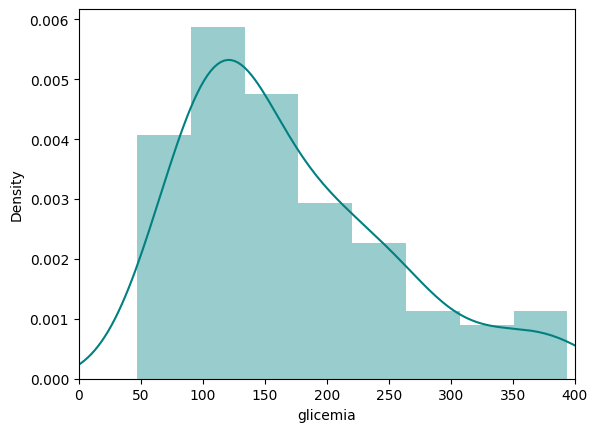

In [33]:
import seaborn as sns

ax = sns.distplot(personas_con_diabetes.glicemia, norm_hist=False)
ax.set_xlim(0,400)


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(personas_sin_diabetes.glicemia, norm_hist=False)



(25.0, 170.0)

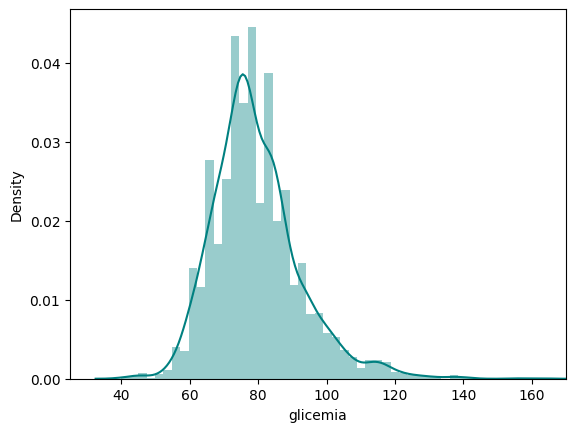

In [34]:
ax = sns.distplot(personas_sin_diabetes.glicemia, norm_hist=False)
ax.set_xlim(25,170)

In [35]:
nulos = ds.glicemia.isnull()

In [36]:
ds[nulos].diabetes.value_counts()

0    337
1      2
Name: diabetes, dtype: int64

In [37]:
ds.glicemia.mean()

81.88316884502534

In [88]:
promedio_personas_con_diabetes = personas_con_diabetes.glicemia.mean()
promedio_personas_con_diabetes

169.87254901960785

In [38]:
ds.fillna({'glicemia':81.8}, inplace=True)

In [39]:
ds.isnull().sum()

sexo                           0
edad                           0
fumador                        0
cigarrillos_por_dia            0
uso_medicamento_presion        0
acv                            0
hipertension                   0
diabetes                       0
colesterol_total               0
presion_arterial_sistolica     0
presion_arterial_diastolica    0
imc                            0
frecuencia_cardiaca            0
glicemia                       0
riesgo_eac_decada              0
dtype: int64

In [40]:
ds.shape

(4088, 15)

## Aula 3

### 3.1 Preparando los datos

In [41]:
ds.summary()

,Feature,Datatype
0,riesgo_eac_decada,categorical/int64
1,sexo,categorical/int64
2,edad,ordinal/int64
3,fumador,categorical/int64
4,cigarrillos_por_dia,ordinal/float64
5,uso_medicamento_presion,categorical/float64
6,acv,categorical/int64
7,hipertension,categorical/int64
8,diabetes,categorical/int64
9,colesterol_total,ordinal/float64


In [42]:
ds = ds.astype(types={'cigarrillos_por_dia':'int64'})

In [43]:
ds = ds.astype(types={'uso_medicamento_presion':'int64'})

In [44]:
ds.summary()

,Feature,Datatype
0,riesgo_eac_decada,categorical/int64
1,sexo,categorical/int64
2,edad,ordinal/int64
3,fumador,categorical/int64
4,cigarrillos_por_dia,ordinal/int64
5,uso_medicamento_presion,ordinal/int64
6,acv,categorical/int64
7,hipertension,categorical/int64
8,diabetes,categorical/int64
9,colesterol_total,ordinal/float64


### 3.2 Ejecutando transformaciones

In [45]:
ds.cigarrillos_por_dia.describe()

count    4088.000000
mean        8.992417
std        11.910941
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigarrillos_por_dia, dtype: float64


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(ds.cigarrillos_por_dia, norm_hist=False)



(0.0, 70.0)

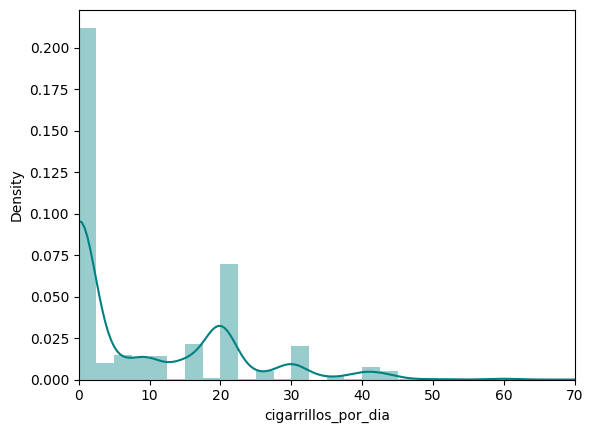

In [46]:
ax = sns.distplot(ds.cigarrillos_por_dia, norm_hist=False)
ax.set_xlim(0,70)

In [47]:
ds.fumador.value_counts()

0    2084
1    2004
Name: fumador, dtype: int64

<Axes: >

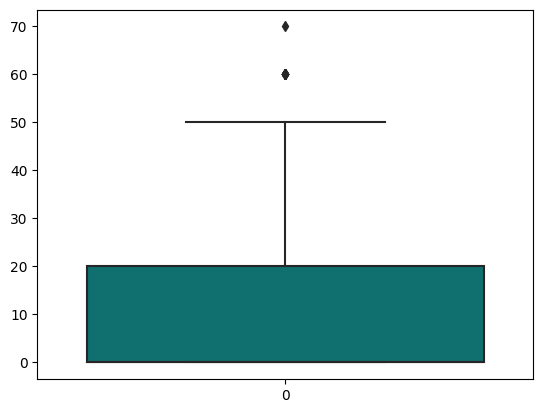

In [48]:
sns.boxplot(ds.cigarrillos_por_dia)

In [49]:
ds.cigarrillos_por_dia.mean()

8.992416829745597

Definiendo las categorías de acuerdo con la cantidad de cigarrillos consumidos por día:

	0 - no fumador;
    
	1 - fumador leve (1 a 10 cigarrillos por día);
    
	2 - fumador moderado (11 a 20 cigarrillos por día);
    
	3 - fumador severo (más de 20 cigarrillos por día).


In [50]:
categorias = [0,1,2,3]
limites = [-1,1,11,21,71]

In [51]:
categoria_de_fumador = pd.cut(ds.cigarrillos_por_dia, limites, labels=categorias)

In [52]:
ds = ds.assign_column('categoria_de_fumador',categoria_de_fumador)

In [53]:
ds.columns

Index(['sexo', 'edad', 'fumador', 'cigarrillos_por_dia',
       'uso_medicamento_presion', 'acv', 'hipertension', 'diabetes',
       'colesterol_total', 'presion_arterial_sistolica',
       'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glicemia',
       'riesgo_eac_decada', 'categoria_de_fumador'],
      dtype='object')

### 3.3 Visualizando datos con ADS

In [54]:
ds.show_in_notebook()

show_in_notebook called but not in notebook environment


### 3.4 Generando más visualizaciones

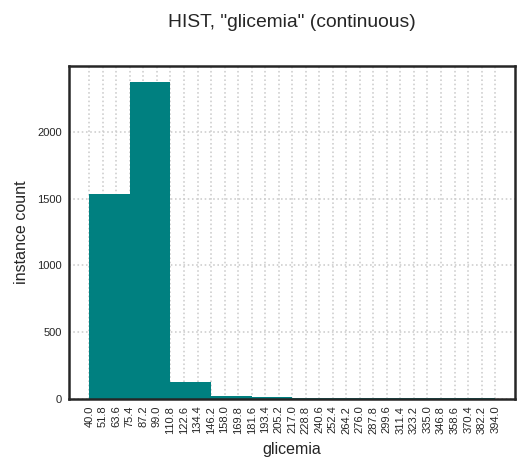

In [55]:
ds.plot('glicemia')

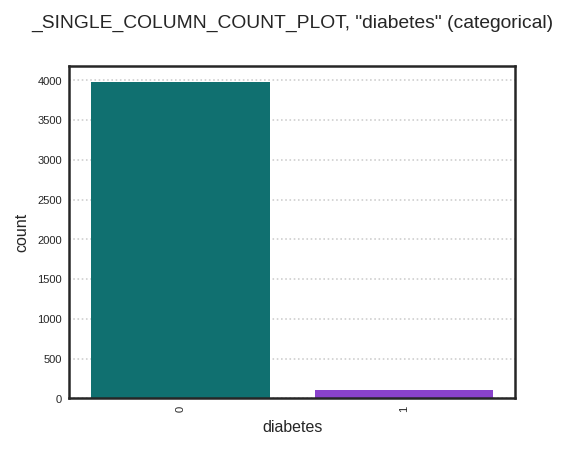

In [56]:
ds.plot('diabetes')


`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  seaborn.kdeplot(s, color=color, shade=True, shade_lowest=False, label=cat)


`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  seaborn.kdeplot(s, color=color, shade=True, shade_lowest=False, label=cat)


`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  seaborn.kdeplot(s, color=color, shade=True, shade_lowest=False, label=cat)


`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  seaborn.kdeplot(s, color=color, shade=True, shade_lowest=False, label=cat)



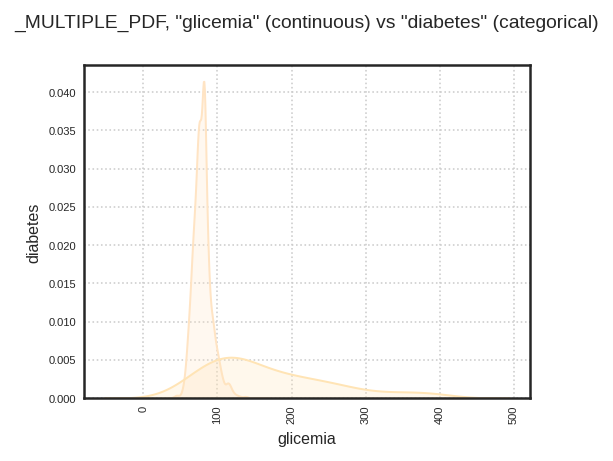

In [57]:
ds.plot('glicemia','diabetes')

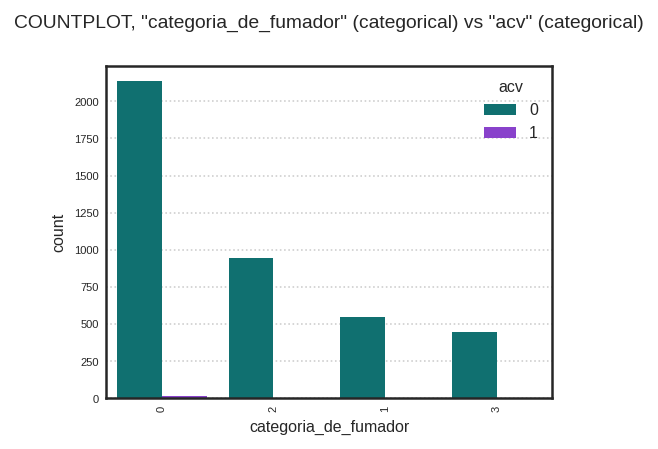

In [58]:
ds.plot('categoria_de_fumador','acv')

In [91]:
pandas_ds = ds.to_pandas()

In [93]:
#sns.pairplot(pandas_ds)

## Aula 4

### 4.1 Correlación

In [62]:
ds.corr()

,edad,cigarrillos_por_dia,colesterol_total,presion_arterial_sistolica,presion_arterial_diastolica,imc,frecuencia_cardiaca,glicemia
edad,1.000000,-0.190383,0.262911,0.389943,0.203561,0.134536,-0.011746,0.113808
cigarrillos_por_dia,-0.190383,1.000000,-0.026620,-0.085891,-0.050922,-0.090474,0.071100,-0.052875
colesterol_total,0.262911,-0.026620,1.000000,0.211712,0.167580,0.121683,0.089519,0.044952
presion_arterial_sistolica,0.389943,-0.085891,0.211712,1.000000,0.784676,0.329870,0.182966,0.128163
presion_arterial_diastolica,0.203561,-0.050922,0.167580,0.784676,1.000000,0.382157,0.178012,0.059748
imc,0.134536,-0.090474,0.121683,0.329870,0.382157,1.000000,0.070806,0.084148
frecuencia_cardiaca,-0.011746,0.071100,0.089519,0.182966,0.178012,0.070806,1.000000,0.094429
glicemia,0.113808,-0.052875,0.044952,0.128163,0.059748,0.084148,0.094429,1.000000


In [63]:
import matplotlib.pyplot as plt

<Axes: >

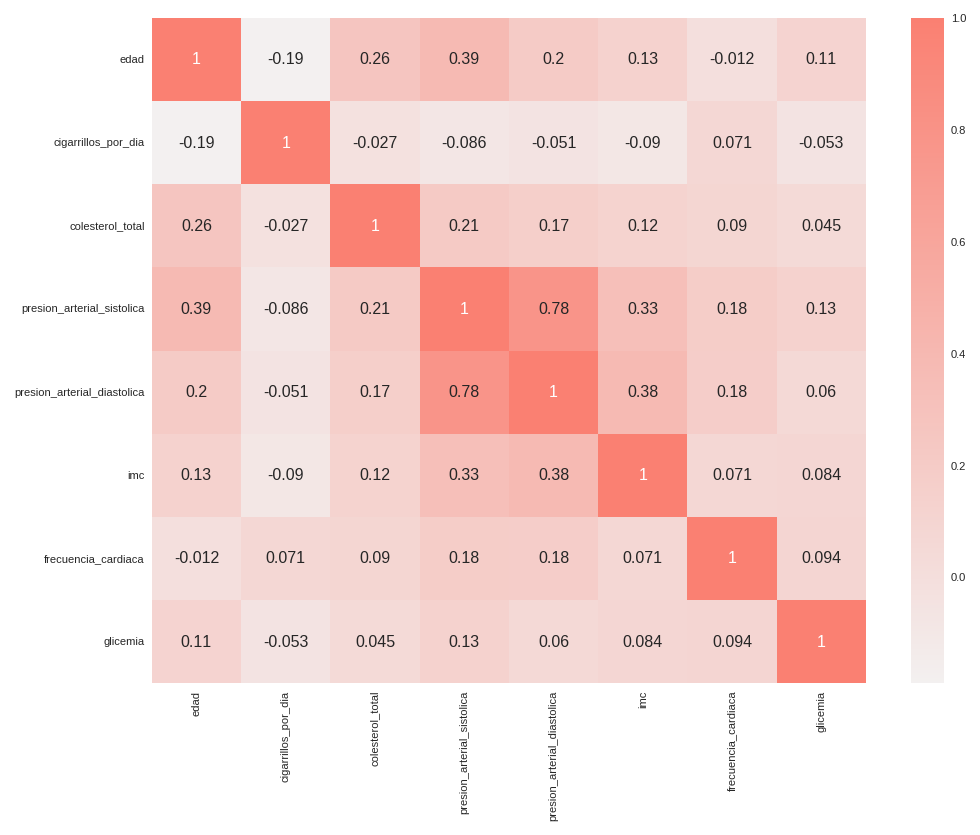

In [64]:
plt.figure(figsize=[8,6])
paleta = sns.color_palette('light:salmon', as_cmap=True)
sns.heatmap(ds.corr(),annot=True, cmap=paleta)

### 4.2 ADS y sugerencias automáticas

In [65]:
ds.suggest_recommendations()

Code
Message                                                       Variables                  Suggested                        Action                                                                          
Strongly correlated with presion_arterial_diastolica(78.47%.) presion_arterial_sistolica Drop presion_arterial_diastolica Drop presion_arterial_sistolica    .drop_columns(["presion_arterial_sistolica"])
                                                                                                                          Drop presion_arterial_diastolica  .drop_columns(["presion_arterial_diastolica"])
                                                                                                                          Do nothing                                                                      
Imbalanced Target(17.57%)                                     riesgo_eac_decada          Up-sample                        Do nothing                                                                      
                                                                                                                          Down-sample                                                       .down_sample()
                                                                                                                          Up-sample                                          .up_sample(sampler='default')

### 4.3 Aplicando sugerencias

In [66]:
base_original = DatasetFactory.open('framingham.csv', target='TenYearCHD')
base_original.head()

  base_original = DatasetFactory.open('framingham.csv', target='TenYearCHD')



loop1:   0%|          | 0/4 [00:00<?, ?it/s]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [67]:
base_original = base_original.rename_columns(dict_ing_esp)
base_original.columns

Index(['sexo', 'edad', 'escolaridad', 'fumador', 'cigarrillos_por_dia',
       'uso_medicamento_presion', 'acv', 'hipertension', 'diabetes',
       'colesterol_total', 'presion_arterial_sistolica',
       'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glicemia',
       'riesgo_eac_decada'],
      dtype='object')

In [68]:
base_original.suggest_recommendations()

Code
Message                                                       Variables                  Suggested                         Action                                                                             
Contains missing values(105)                                  escolaridad                Fill missing values with frequent Drop                                                 .drop_columns(["escolaridad"])
                                                                                                                           Fill missing values with frequent                     .fillna({"escolaridad": 1.0})
                                                                                                                           Fill missing values with constant              .fillna({"escolaridad": "constant"})
                                                                                                                           Do nothing                                                                         
Contains missing values(29)                                   cigarrillos_por_dia        Fill missing values with frequent Drop                                         .drop_columns(["cigarrillos_por_dia"])
                                                                                                                           Fill missing values with frequent             .fillna({"cigarrillos_por_dia": 0.0})
                                                                                                                           Fill missing values with constant      .fillna({"cigarrillos_por_dia": "constant"})
                                                                                                                           Do nothing                                                                         
Contains missing values(53)                                   uso_medicamento_presion    Fill missing values with frequent Drop                                     .drop_columns(["uso_medicamento_presion"])
                                                                                                                           Fill missing values with frequent         .fillna({"uso_medicamento_presion": 0.0})
                                                                                                                           Fill missing values with constant  .fillna({"uso_medicamento_presion": "constant"})
                                                                                                                           Do nothing                                                                         
Contains missing values(50)                                   colesterol_total           Fill missing values with frequent Drop                                            .drop_columns(["colesterol_total"])
                                                                                                                           Fill missing values with frequent              .fillna({"colesterol_total": 240.0})
                                                                                                                           Fill missing values with constant         .fillna({"colesterol_total": "constant"})
                                                                                                                           Do nothing                                                                         
Contains missing values(19)                                   imc                        Fill missing values with mean     Drop                                                         .drop_columns(["imc"])
                                                                                                                           Fill missing values with mean                              .fillna({"imc": 25.802})
                                                              

In [69]:
base_original = base_original.auto_transform()


loop1:   0%|          | 0/7 [00:00<?, ?it/s]

In [70]:
base_original.show_in_notebook()

show_in_notebook called but not in notebook environment


### 4.4 Comparando las bases

In [71]:
ds.show_in_notebook()

show_in_notebook called but not in notebook environment


## Aula 5

### 5.1 Balanceo de los datos

In [72]:
ds.target.show_in_notebook()

show_in_notebook called but not in notebook environment


In [73]:
ds.riesgo_eac_decada.value_counts(normalize=True)

0    0.850538
1    0.149462
Name: riesgo_eac_decada, dtype: float64

### 5.2 Aplicando el balanceo

In [74]:
ds.riesgo_eac_decada.value_counts()

0    3477
1     611
Name: riesgo_eac_decada, dtype: int64

In [76]:
!pip install imbalanced-learn

In [77]:
import imblearn

In [78]:
ds_balanceado = ds.up_sample(sampler='default')

In [79]:
ds_balanceado.show_in_notebook()

show_in_notebook called but not in notebook environment


### 5.3 Documentación de datos

In [80]:
descripcion = """
- Información general: Esta base de datos se refiere a un estudio realizado recolectando datos sobre el estado de salud de los pacientes para tratar de clasificar el riesgo de enfermedad coronaria en los próximos 10 años. Para consultar la base original, puede acceder al siguiente [link](https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression).

Los datos fueron modificados con el objetivo de corregir los problemas de la base y dejarla lista para poder realizar modelos empleando Machine Learning.

-Tipo de las Columnas:
    - 'sexo': booleano;
    - 'edad': numérico;
    - 'cigarrillos_por_dia': categórico;
    - 'uso_medicamento_presion': booleano;
    - 'acv': booleano;
    - 'hipertension': booleano;
    - 'diabetes': booleano;
    - 'colesterol_total': numérico;
    - 'presion_arterial_sistolica': numérico;
    - 'presion_arterial_diastolica': numérico;
    - 'imc': numérico;
    - 'frecuencia_cardiaca': numérico;
    - 'glicemia': numérico;
    - 'riesgo_eac_decada': booleano.

- Detalle de las Columnas:
    - 'sexo': Considera masculino como 1 y femenino como 0;
    - 'edad': Edad en años completos;
    - 'cigarrillos_por_dia': Clasificación de las personas según la cantidad de cigarrillos consumidos por día:
        0 - no fumador;
        1 - fumador leve (1 a 10 cigarrillos por día);
        2 - fumador moderado (11 a 20 cigarrillos por día);
        3 - fumador severo (más de 20 cigarrillos por día).
    - 'uso_medicamento_presion': Si la persona toma o no medicamentos para la presión;
    - 'acv': Si ya tuvo Accidente Cerebro-Vascular;
    - 'hipertension': Si la persona sufre de hipertensión;
    - 'diabetes': Si la persona es diabética;
    - 'colesterol_total': Cantidad de colesterol total;
    - 'presion_arterial_sistolica': Presión arterial sistólica medida;
    - 'presion_arterial_diastolica': Presión arterial diastólica medida;
    - 'imc': Índice de masa corporal;
    - 'frecuencia_cardiaca': frecuencia cardíaca en pulsaciones por minuto;
    - 'glicemia': Cantidad de glicemia en la sangre,
    - 'riesgo_EAC_decada': Clasificación de riesgo para enfermedad coronaria en los próximos 10 años:
        0 - No está en el grupo de riesgo;
        1 - Está en el grupo de riesgo.
"""

In [81]:
ds_balanceado.description

In [82]:
ds_balanceado.set_description(descripcion)

In [83]:
ds_balanceado.description

"\n- Información general: Esta base de datos se refiere a un estudio realizado recolectando datos sobre el estado de salud de los pacientes para tratar de clasificar el riesgo de enfermedad coronaria en los próximos 10 años. Para consultar la base original, puede acceder al siguiente [link](https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression).\n\nLos datos fueron modificados con el objetivo de corregir los problemas de la base y dejarla lista para poder realizar modelos empleando Machine Learning.\n\n-Tipo de las Columnas:\n    - 'sexo': booleano;\n    - 'edad': numérico;\n    - 'cigarrillos_por_dia': categórico;                                                                   \n    - 'uso_medicamento_presion': booleano;\n    - 'acv': booleano;\n    - 'hipertension': booleano;\n    - 'diabetes': booleano;\n    - 'colesterol_total': numérico;\n    - 'presion_arterial_sistolica': numérico;\n    - 'presion_arterial_diastolica': numérico;\n    - 'imc': numé

In [84]:
ds_balanceado.show_in_notebook()

show_in_notebook called but not in notebook environment


### 5.4 Generando un CSV

In [85]:
ds_balanceado.to_csv('datos_salud_final.csv', index=False)